# <font color=brown>Wake County Neighborhoods project

</font>

 <br>
 <br>
 
## <font color=blue><center>Week 4 assignment - Problem Statement and methodology</center> </font>

## What is this about? <br>
## Find best places to live in Wake county North Carolina for families with school going children.

I live in Wake County , North Carolina. This is the most populous county in the state of North Carolina and it has some of the best rated cities/towns to live in, and it is one of the best schooling systems out there.


   Recently, because of low real estate prices compared to big cities and with a high standard of living , there has been a spike in migration to this county from other major cities in the USA and other countries. On average 70 people move to this county on a daily basis . I had a hard time picking the right place to rent/buy when I moved here with my family.<b> This project is to help new comers to this county, especially families with school age children find the best nighbourhood suitable for their family.I will be bringing the Public Shools data into the mix to make this more oriented towards our goal to find the best spots for families moving with school going kids. <b>


<img src="Wake_County_Logo_BW.jpg">



As part of this project, I'm going to describe the following steps to compile the "battle of neighborhoods in Wake County,NC" project. 

    
1. <font color=green> Data Strategy </font> <br>

    . Get the zip codes in Wake county from the Wake County zoning data available through Wake County Open Data portal. <br>
      This will be used to pick the necessary neighborhoods for analysis.   <br>
    . Obtain the geo locations of these zip codes using geopy library. This location data is used to gather venue information from Foursquare  <br>
    . Obtain Wake County Public School information through Wake County Open Data portal. This is used to add in the school data for analysis. <br>
    . Obtain North Carolina Census data from NC Gov. This is take population into consideration to determine the similarity of a neighborhood  <br>
    . Use Foresquare Data to gather data about the venues in the neighborhood zipcodes we are interested in.  <br>


2. <font color=green> Data Engineering </font> 
    . For this prject I will am using pandas DataFrames and Numpy arrays to store the data.
    . Use different libraries from Pandas ,Numpy, GeoPandas,Geopy to wrangle with out tabular, Json and GeoJson data. 

3. <font color=green> Data Analysis and Models Analysis </font> <br>

    . Use K-Means Clustering to cluster similar neighborhoods. <br>
    
4. <font color=green>Data Visualizations </font>   
    . For this project, folium maps with simple markers make the most sense to analyze data and to present the findings.
    . Use Barcharts to analyze and present the findings.
    
5. <font color=green> Compare the Neighborhoods to Find the Best Place for for families with school age kids. </font>  
    . We will be looking at the below dimensions and rate them between Low, Medium and High.<br>
        Schools Availability 
        Real Estate Price range Estimate 
        Food and Entertainment index 
        Investment Return potential 


5. <font color=green> Findings and Conclusion. </font> <br>


<font color=orange>Intended Audience</font>

1. People who want to move to Wkae county,NC.<br>
2. Investors, who can quickly find the desirability of a location based on different cluster charactetistics and invest in that locality.<br>
3. City planners. 

 <br>
 <br>
 
## <font color=blue><center>Week 5 assignment - Code, analysis </center> </font>

#### Import all the libraries necessary for Data wrangling and visualization.

In [ ]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

#import the necessary libraries for Kmeans
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 


import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

# Import libraries
import pandas as pd
import numpy as np
import math

import geopandas
import json

from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, NumeralTickFormatter
from bokeh.palettes import brewer

from bokeh.io.doc import curdoc
from bokeh.models import Slider, HoverTool, Select
from bokeh.layouts import widgetbox, row, column

##  Gather Data

In [1541]:
#Gather School District data. This will be later concatenated with Fursquare venue data.
schools=pd.read_json('wcpss.json')

In [1540]:
schools.head()


,website,city,phone,tag,geo_shape,calendar
0,http://rootes.weebly.com/,RALEIGH,919-881-4940,548,"{'geometry': {'type': 'Point', 'coordinates': ...",T
1,None,RALEIGH,919-856-8120,010,"{'geometry': {'type': 'Point', 'coordinates': ...",None
2,http://eastcaryms.wcpss.net/,CARY,919-466-4377,402,"{'geometry': {'type': 'Point', 'coordinates': ...",Y
3,http://www.wcpss.net/connes,RALEIGH,919-856-7637,380,"{'geometry': {'type': 'Point', 'coordinates': ...",T
4,http://middlecreekelementaryschool.weebly.com/,CARY,919-773-9555,494,"{'geometry': {'type': 'Point', 'coordinates': ...",Y


In [ ]:
# Gather Zoning data for zip codes.
zoning=pd.read_json('https://opendata.arcgis.com/datasets/438580f5c9744663970d41773faeab10_0.geojson')

In [ ]:
#columns in zoning Json file
list(zoning['features'][0]['properties'].keys())

In [ ]:
#Unpack the zoning data 

#dataz=pd.DataFrame(dataz) 
zoning_data=[]#pd.DataFrame(columns=[list(zoning['features'][0]['properties'].keys())])
for i in range(0, len(zoning)):
    zoning_data.append((zoning['features'][i]['properties']['OBJECTID'],zoning['features'][i]['properties']['TAG'],zoning['features'][i]['properties']['NAME']
                        , zoning['features'][i]['properties']['GRADELEVEL'], zoning['features'][i]['properties']['PHONE'],zoning['features'][i]['properties']['CALENDAR'],
                        zoning['features'][i]['properties']['ADDRESSNUM'],zoning['features'][i]['properties']['ADDRESS'],zoning['features'][i]['properties']['CITY'],
                        zoning['features'][i]['properties']['ZIPCODE'],zoning['features'][i]['properties']['MAGNETPROGRAM'], zoning['features'][i]['properties']['WEBSITE'],
                        zoning['features'][i]['properties']['DISTRICT'],zoning['features'][i]['properties']['TYPE']))
    
zoning_data=pd.DataFrame(zoning_data,columns=list(zoning['features'][0]['properties'].keys()))

In [1544]:
zoning_data.head()

,OBJECTID,TAG,NAME,GRADELEVEL,PHONE,CALENDAR,ADDRESSNUM,ADDRESS,CITY,ZIPCODE,MAGNETPROGRAM,WEBSITE,DISTRICT,TYPE
0,1,568,Swift Creek Elementary,Elementary,919-233-4320,Traditional,5601,Tryon Rd,Raleigh,27606,N/A,http://www.wcpss.net/swiftcreekes,5,Elementary Schools
1,2,340,Briarcliff Elementary,Elementary,919-460-3443,Traditional,1220,Pond St,Cary,27511,N/A,http://www.wcpss.net/briarcliffes,9,Elementary Schools
2,3,414,Farmington Woods Elementary,Elementary,919-460-3469,Traditional,1413,Hampton Valley Rd,Cary,27511,International Baccalaureate Programme,http://www.wcpss.net/farmingtonwoodses,9,Magnet Elementary School
3,4,368,Cary High,High,919-460-3549,Traditional,638,Walnut St,Cary,27511,N/A,http://www.wcpss.net/caryhs,9,High School
4,5,304,Adams Elementary,Elementary,919-460-3431,Year-Round,805,Cary Towne Blvd,Cary,27511,N/A,http://www.wcpss.net/adamses,9,Elementary Schools


In [ ]:
#delete values that are missing a city name
x=zoning_data[zoning_data['CITY']==' '].index
zoning_data.drop(index=x,inplace=True)

In [1545]:
zoning_data['CITY'].unique()

array(['Raleigh', 'Cary', 'Apex', 'Fuquay-Varina', 'Garner', 'Knightdale',
       'Wendell', 'Zebulon', 'Rolesville', 'Wake Forest', 'Morrisville',
       'Holly Springs', 'Willow Springs', 'Fuquay Varina'], dtype=object)

In [1345]:
#Combine the school data to create a descriptive text to show on the map

type_count = zoning_data.groupby(['CITY','ZIPCODE','TYPE']).agg({'TYPE': 'count'}).rename(columns={'TYPE':'COUNT'}).reset_index()
        
type_count=pd.DataFrame(type_count)    

type_count['Text']=type_count["TYPE"] +' '+ type_count["COUNT"].astype(str)
type_count=type_count.groupby(['ZIPCODE'])['Text'].apply(lambda x: ','.join(x)).reset_index()
type_count.head()

,ZIPCODE,Text
0,27502,"Elementary Schools 4,Future Sites 1,High Schoo..."
1,27511,"Elementary Schools 3,High School 1,Magnet Elem..."
2,27513,"Elementary Schools 3,Magnet Elementary School ..."
3,27518,"Administration 2,Elementary Schools 1,Magnet H..."
4,27519,"Elementary Schools 8,High School 3,Middle Scho..."


# Gather geo location data for zip codes using geocode.

In [ ]:
#import geopy libraries
import ssl
import certifi
import geopy.geocoders
from geopy.geocoders import Nominatim

In [ ]:
#set up geocode function to provide the location details for the zip codes 
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
Raleigh_neighborhoods['location'] = Raleigh_neighborhoods['ZIPCODE'].apply(geocode, country_codes='US')

In [ ]:
#zoning_data[['ZIPCODE','CITY']]
Raleigh_neighborhoods = zoning_data.groupby(['ZIPCODE'])['CITY'].unique().apply(list).apply(lambda x: ', '.join(x)).to_frame()
Raleigh_neighborhoods.reset_index(inplace = True)
c='Fuquay-Varina'
Raleigh_neighborhoods['CITY'][6] =c
Raleigh_neighborhoods

In [ ]:
#gather geo data for the zipcodes
Raleigh_neighborhoods['geo']=[x[0:2] for x in Raleigh_neighborhoods['location'].apply(lambda loc: tuple(loc.point) if loc else None)]

In [1546]:
Raleigh_neighborhoods.head()

,ZIPCODE,CITY,location,geo
0,27502,Apex,"(Friendship, Apex, Wake County, North Carolina...","(35.7289032, -78.89319159574836)"
1,27511,Cary,"(Kildaire Farms, Raleigh, Wake County, North C...","(35.7564404, -78.781422)"
2,27513,Cary,"(Weston, Morrisville, Wake County, North Carol...","(35.812963749999994, -78.80742802541542)"
3,27518,Cary,"(Piney Plains, Raleigh, Wake County, North Car...","(35.75471245, -78.75532640688729)"
4,27519,Cary,"(Wake County, North Carolina, 27519, United St...","(35.797509370161215, -78.88121876337784)"


#### Merge the neighborhood data with the schools info downloaded from wake gov. Assign the geo locations to the schools to form a comprehensive data set

In [1547]:


school_zones=pd.merge(zoning_data, Raleigh_neighborhoods, how='left', on='ZIPCODE')

school_zones.head()

,OBJECTID,TAG,NAME,GRADELEVEL,PHONE,CALENDAR,ADDRESSNUM,ADDRESS,CITY_x,ZIPCODE,MAGNETPROGRAM,WEBSITE,DISTRICT,TYPE,CITY_y,location,geo
0,1,568,Swift Creek Elementary,Elementary,919-233-4320,Traditional,5601,Tryon Rd,Raleigh,27606,N/A,http://www.wcpss.net/swiftcreekes,5,Elementary Schools,Raleigh,"(Glenwood South, Wake County, North Carolina, ...","(35.7778503, -78.6626268)"
1,2,340,Briarcliff Elementary,Elementary,919-460-3443,Traditional,1220,Pond St,Cary,27511,N/A,http://www.wcpss.net/briarcliffes,9,Elementary Schools,Cary,"(Kildaire Farms, Raleigh, Wake County, North C...","(35.7564404, -78.781422)"
2,3,414,Farmington Woods Elementary,Elementary,919-460-3469,Traditional,1413,Hampton Valley Rd,Cary,27511,International Baccalaureate Programme,http://www.wcpss.net/farmingtonwoodses,9,Magnet Elementary School,Cary,"(Kildaire Farms, Raleigh, Wake County, North C...","(35.7564404, -78.781422)"
3,4,368,Cary High,High,919-460-3549,Traditional,638,Walnut St,Cary,27511,N/A,http://www.wcpss.net/caryhs,9,High School,Cary,"(Kildaire Farms, Raleigh, Wake County, North C...","(35.7564404, -78.781422)"
4,5,304,Adams Elementary,Elementary,919-460-3431,Year-Round,805,Cary Towne Blvd,Cary,27511,N/A,http://www.wcpss.net/adamses,9,Elementary Schools,Cary,"(Kildaire Farms, Raleigh, Wake County, North C...","(35.7564404, -78.781422)"


#### Import and merge population data with neighborhood data

In [ ]:
# IMPORT POPULATION DATA
population=pd.read_csv('POPULATION WAKE.csv')

In [ ]:
#school_zones
#population
rem=['town','city','village']

for i in (0,len(population)):
    population['City']=population['City'].str.replace(r'town','')
    population['City']=population['City'].str.replace(r'city','')
    population['City']=population['City'].str.replace(r'village','')
    
 
population['City']=population['City'].str.rstrip()


In [1549]:
population.head()

,City,Population 2018
0,Aberdeen,7708
1,Ahoskie,4801
2,Alamance,1032
3,Albemarle,16106
4,Alliance,758


In [ ]:
#merge school data with population
school_zones=pd.merge(school_zones, population, how='left', left_on='CITY_x',right_on='City')[['OBJECTID', 'TAG', 'NAME', 'GRADELEVEL', 'PHONE', 'CALENDAR',
                                                                                               'ADDRESSNUM', 'ADDRESS', 'CITY_x', 'ZIPCODE', 'MAGNETPROGRAM',
                                                                                               'WEBSITE', 'DISTRICT', 'TYPE', 'location', 'geo','Population 2018']]

In [ ]:
c='Fuquay-Varina'
school_zones['CITY_x'][207] =c


## Analyze the different neighborhoods and the density of different schools in that area

In [1290]:
#count total num of schools
school_Total_Count=school_zones.groupby(['ZIPCODE','CITY_x','geo'])['TYPE'].count().reset_index(name ='SchoolsCount')
school_Total_Count=pd.merge(school_Total_Count,type_count,how='left',on='ZIPCODE')

In [1550]:
school_Total_Count.head()

,ZIPCODE,CITY_x,geo,SchoolsCount,Text,Latitude,Longitude
0,27502,Apex,"(35.7289032, -78.89319159574836)",9,"Elementary Schools 4,Future Sites 1,High Schoo...",35.728903,-78.893192
1,27511,Cary,"(35.7564404, -78.781422)",6,"Elementary Schools 3,High School 1,Magnet Elem...",35.756440,-78.781422
2,27513,Cary,"(35.812963749999994, -78.80742802541542)",6,"Elementary Schools 3,Magnet Elementary School ...",35.812964,-78.807428
3,27518,Cary,"(35.75471245, -78.75532640688729)",5,"Administration 2,Elementary Schools 1,Magnet H...",35.754712,-78.755326
4,27519,Cary,"(35.797509370161215, -78.88121876337784)",14,"Elementary Schools 8,High School 3,Middle Scho...",35.797509,-78.881219


In [ ]:
#Change the data to be grouped by each neighborhood
s=school_zones.groupby(['ZIPCODE','TYPE'])['TYPE'].count().reset_index(name ='Total Count').pivot_table(index ='ZIPCODE',columns='TYPE',fill_value=0)

In [ ]:
#s.reset_index()
#s.columns = s.columns.droplevel(1)
s=pd.DataFrame(s)
s.reset_index(inplace=True)

In [1551]:
# School Type Pivot
s.head()

TYPE,ZIPCODE,Academies,Administration,Elementary Schools,Future Sites,High School,Magnet Elementary School,Magnet High School,Magnet Middle School,Middle School,Special / Optional Schools
0,27502,0,0,4,1,2,0,0,0,2,0
1,27511,0,0,3,0,1,1,0,0,1,0
2,27513,0,0,3,0,0,1,0,1,1,0
3,27518,0,2,1,0,0,0,1,0,0,1
4,27519,0,0,8,0,3,0,0,0,3,0


In [ ]:
school_zones=pd.merge(school_zones, s, how='left', left_on='ZIPCODE',right_on='ZIPCODE')

In [1292]:

locations = school_Total_Count['geo']
locationlist = locations.values.tolist()
Value=school_Total_Count['SchoolsCount']
Valuelist = Value.values.tolist()

## Explore schools and venues for the zipcodes in Wake County ,NC

In [1351]:

map = folium.Map(location=[35.7778503, -78.6626268], zoom_start=12)
for point in range(0, len(school_Total_Count)):
    folium.Marker(locationlist[point],popup=str(school_Total_Count['Text'].values.tolist()[point])).add_to(map)
map



In [1352]:
#define foursquare credentials
CLIENT_ID = '1BMXXAQ21P2I1PW3RPIKIRK5F0Y1XPSXLX52LKNWARA5XWKY' 
CLIENT_SECRET = 'SZRHO5ANITMUFPIWXLNAFNWXYE3M1AGE0MTH3VABGWJEBAWZ' 
VERSION = '20200401' # Foursquare API version


In [1364]:
# test with one reslut first
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 2000 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    35.732502,
    -78.894608,
    radius, 
    LIMIT)


In [1365]:
url

'https://api.foursquare.com/v2/venues/explore?&client_id=1BMXXAQ21P2I1PW3RPIKIRK5F0Y1XPSXLX52LKNWARA5XWKY&client_secret=SZRHO5ANITMUFPIWXLNAFNWXYE3M1AGE0MTH3VABGWJEBAWZ&v=20200401&ll=35.732502,-78.894608&radius=2000&limit=100'

In [1366]:
results = requests.get(url).json()

### Category information for the venues is hidden 2 levels deeper in the dictionary. Lets get a function to extract that.

In [1367]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [1555]:
# Function to gather venue data for all the zip codes iteratively
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Postcode', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [1556]:
wake_venues = getNearbyVenues(names = school_Total_Count['ZIPCODE'],
                                   latitudes = school_Total_Count['Latitude'],
                                   longitudes =school_Total_Count['Longitude']
                                  )

27502
27511
27513
27518
27519
27523
27526
27529
27539
27540
27545
27560
27571
27587
27591
27592
27597
27601
27603
27604
27605
27606
27607
27608
27609
27610
27612
27613
27614
27615
27616
27617


#### data for venues gathered from foursquare.

In [1388]:

print(wake_venues.shape)
#wake_venues[wake_venues['Postcode']==27617]
wake_venues.head()

(562, 7)


,Postcode,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,27502,35.728903,-78.893192,Kidstown Playground / Kelly Road Park,35.732502,-78.894608,Playground
1,27502,35.728903,-78.893192,Kelly Road Softball Field,35.732697,-78.894114,Baseball Field
2,27502,35.728903,-78.893192,greenbrier pool,35.728583,-78.898426,Pool
3,27502,35.728903,-78.893192,Kleibers Kasa,35.723466,-78.893934,Australian Restaurant
4,27502,35.728903,-78.893192,Precision Renovations,35.730846,-78.900341,Construction & Landscaping


In [1354]:
#fixing lat and long for school data. This will be added to the venues data , to answer the question which locations have 
#the best mix of places including schools for families wit school age children.
school_Total_Count['Latitude']=school_Total_Count['geo'][0][0]
school_Total_Count['Longitude']=school_Total_Count['geo'][0][1]


In [ ]:
for i in range (0,len(school_Total_Count)):
    school_Total_Count['Latitude'][i]=school_Total_Count['geo'][i][0]
    school_Total_Count['Longitude'][i]=school_Total_Count['geo'][i][1]

In [1361]:
school_Total_Count.head()

,ZIPCODE,CITY_x,geo,SchoolsCount,Text,Latitude,Longitude
0,27502,Apex,"(35.7289032, -78.89319159574836)",9,"Elementary Schools 4,Future Sites 1,High Schoo...",35.728903,-78.893192
1,27511,Cary,"(35.7564404, -78.781422)",6,"Elementary Schools 3,High School 1,Magnet Elem...",35.756440,-78.781422
2,27513,Cary,"(35.812963749999994, -78.80742802541542)",6,"Elementary Schools 3,Magnet Elementary School ...",35.812964,-78.807428
3,27518,Cary,"(35.75471245, -78.75532640688729)",5,"Administration 2,Elementary Schools 1,Magnet H...",35.754712,-78.755326
4,27519,Cary,"(35.797509370161215, -78.88121876337784)",14,"Elementary Schools 8,High School 3,Middle Scho...",35.797509,-78.881219


In [ ]:
#fix lat and long
school_zones['Latitude']=school_zones['geo'][0][0]
school_zones['Longitude']=school_zones['geo'][0][1]
for i in range (0,len(school_zones)):
    school_zones['Latitude'][i]=school_zones['geo'][i][0]
    school_zones['Longitude'][i]=school_zones['geo'][i][1]

In [1379]:
school_zones.head()

,OBJECTID,TAG,NAME,GRADELEVEL,PHONE,CALENDAR,ADDRESSNUM,ADDRESS,CITY_x,ZIPCODE,MAGNETPROGRAM,WEBSITE,DISTRICT,TYPE,location,geo,Population 2018,Latitude,Longitude
0,1,568,Swift Creek Elementary,Elementary,919-233-4320,Traditional,5601,Tryon Rd,Raleigh,27606,N/A,http://www.wcpss.net/swiftcreekes,5,Elementary Schools,"(Glenwood South, Wake County, North Carolina, ...","(35.7778503, -78.6626268)",469298.0,35.77785,-78.662627
1,2,340,Briarcliff Elementary,Elementary,919-460-3443,Traditional,1220,Pond St,Cary,27511,N/A,http://www.wcpss.net/briarcliffes,9,Elementary Schools,"(Kildaire Farms, Raleigh, Wake County, North C...","(35.7564404, -78.781422)",168160.0,35.75644,-78.781422
2,3,414,Farmington Woods Elementary,Elementary,919-460-3469,Traditional,1413,Hampton Valley Rd,Cary,27511,International Baccalaureate Programme,http://www.wcpss.net/farmingtonwoodses,9,Magnet Elementary School,"(Kildaire Farms, Raleigh, Wake County, North C...","(35.7564404, -78.781422)",168160.0,35.75644,-78.781422
3,4,368,Cary High,High,919-460-3549,Traditional,638,Walnut St,Cary,27511,N/A,http://www.wcpss.net/caryhs,9,High School,"(Kildaire Farms, Raleigh, Wake County, North C...","(35.7564404, -78.781422)",168160.0,35.75644,-78.781422
4,5,304,Adams Elementary,Elementary,919-460-3431,Year-Round,805,Cary Towne Blvd,Cary,27511,N/A,http://www.wcpss.net/adamses,9,Elementary Schools,"(Kildaire Farms, Raleigh, Wake County, North C...","(35.7564404, -78.781422)",168160.0,35.75644,-78.781422


## Concatenate schools data to foursquare venue data for each zip code

In [ ]:

school_venues=school_zones.copy(deep=True)

school_venues['Neighborhood Latitude']=school_venues['Latitude']
school_venues['Neighborhood Longitude']=school_venues['Longitude']

school_venues2=pd.DataFrame(columns=['Postcode', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue',
       'Venue Latitude', 'Venue Longitude', 'Venue Category'])
school_venues2=school_venues[['ZIPCODE', 'Neighborhood Latitude', 'Neighborhood Longitude', 'NAME','Latitude', 'Longitude', 'TYPE']]
school_venues2.rename({'ZIPCODE':'Postcode','NAME':'Venue','Latitude':'Venue Latitude','Longitude':'Venue Longitude','TYPE':'Venue Category'},axis=1,inplace=True)

wake_venues_concat=pd.concat([wake_venues, school_venues2],ignore_index=True,axis=0)



In [1691]:
#check the data 
wake_venues_concat.head()

,Postcode,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,27502,35.728903,-78.893192,Kidstown Playground / Kelly Road Park,35.732502,-78.894608,Playground
1,27502,35.728903,-78.893192,Kelly Road Softball Field,35.732697,-78.894114,Baseball Field
2,27502,35.728903,-78.893192,greenbrier pool,35.728583,-78.898426,Pool
3,27502,35.728903,-78.893192,Kleibers Kasa,35.723466,-78.893934,Australian Restaurant
4,27502,35.728903,-78.893192,Precision Renovations,35.730846,-78.900341,Construction & Landscaping


#### Histogram to get an understanding of how much data we have. In other words how many Zipcodes per venue.

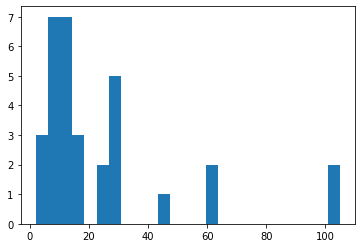

In [1441]:
wake_venues_count = wake_venues_concat.groupby('Postcode').count().reset_index()
wake_venues_count = wake_venues_count[['Postcode', 'Venue Category']]
wake_venues_count.columns = ['Postcode', 'Venue Category Count']

plt.hist(wake_venues_count['Venue Category Count'], bins = 25)
plt.show()

#### create list with neighborhoods to exclude that does not have lot of venues.Only 1 venues is excluded. The data looks good


In [1442]:
#create list with neighborhoods to exclude.

neigh_to_exclude = wake_venues_count[wake_venues_count['Venue Category Count'] < 4]
#create filtered dataframe by excluding neighborhoods in above list
wake_venues_filt = wake_venues_concat[~wake_venues_concat['Postcode'].isin(neigh_to_exclude)]
#rename filtered dataframe back to venues
wake_venues_concat = wake_venues_filt
#check counts after filtering
wake_venues_concat.groupby('Postcode').count().head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Postcode,,,,,,
27502,14,14,14,14,14,14
27511,45,45,45,45,45,45
27513,9,9,9,9,9,9
27518,12,12,12,12,12,12
27519,17,17,17,17,17,17


### Pivot Each Neighborhood with encoding technique discussed in the course lab.
#### This helps us to quickly look at all the venues and their mean occurance.

In [1443]:
# one hot encoding
wake_onehot = pd.get_dummies(wake_venues_concat[['Venue Category']], prefix="", prefix_sep="")

#rename the column 'Neighborhood' which represents a category name to 'Neighborhood Category' 
#this is to distinguish this column from the 'Neighborhood' column which we want to continue to use as the neighborhood name
wake_onehot.rename(columns={'Neighborhood':'Neighborhood Category'}, inplace=True)

# add neighborhood column back to dataframe
wake_onehot['Postcode'] = wake_venues_concat['Postcode'] 

# move neighborhood column to the first column
fixed_columns = [wake_onehot.columns[-1]] + list(wake_onehot.columns[:-1])
wake_onehot = wake_onehot[fixed_columns]




In [1560]:
# test the data
wake_onehot.head()

,Postcode,Academies,Administration,Airport,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Garden,Beer Store,Bookstore,Boutique,Breakfast Spot,Brewery,Bridal Shop,Burger Joint,Bus Station,Business Service,Café,Candy Store,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Doctor's Office,Donut Shop,Elementary Schools,Event Space,Eye Doctor,Fabric Shop,Farm,Fast Food Restaurant,Flower Shop,Food,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Future Sites,Garden Center,Gas Station,Gastropub,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Health & Beauty Service,High School,Hobby Shop,Home Service,Hot Dog Joint,Hotel,IT Services,Ice Cream Shop,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Lawyer,Lingerie Store,Liquor Store,Locksmith,Lounge,Magnet Elementary School,Magnet High School,Magnet Middle School,Martial Arts Dojo,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle School,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Museum,Music Store,Music Venue,Nail Salon,Noodle House,Optical Shop,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Road,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Ski Area,Smoke Shop,Social Club,Southern / Soul Food Restaurant,Spa,Speakeasy,Special / Optional Schools,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tiki Bar,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Store,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,27502,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,27502,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,27502,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,27502,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,27502,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [1561]:
# get the mean of the counts for all categories with one hot method as explained in the course.
wake_grouped = wake_onehot.groupby('Postcode').mean().reset_index()
wake_grouped.head()

,Postcode,Academies,Administration,Airport,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Garden,Beer Store,Bookstore,Boutique,Breakfast Spot,Brewery,Bridal Shop,Burger Joint,Bus Station,Business Service,Café,Candy Store,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Doctor's Office,Donut Shop,Elementary Schools,Event Space,Eye Doctor,Fabric Shop,Farm,Fast Food Restaurant,Flower Shop,Food,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Future Sites,Garden Center,Gas Station,Gastropub,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Health & Beauty Service,High School,Hobby Shop,Home Service,Hot Dog Joint,Hotel,IT Services,Ice Cream Shop,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Lawyer,Lingerie Store,Liquor Store,Locksmith,Lounge,Magnet Elementary School,Magnet High School,Magnet Middle School,Martial Arts Dojo,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle School,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Museum,Music Store,Music Venue,Nail Salon,Noodle House,Optical Shop,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Road,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Ski Area,Smoke Shop,Social Club,Southern / Soul Food Restaurant,Spa,Speakeasy,Special / Optional Schools,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tiki Bar,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Store,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,27502,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.071429,0.0,0.0,0.0,0.000000,0.0,0.0,0.071429,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.285714,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.071429,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.142857,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.142857,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.071429,0.0,0.071429,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,27511,0.0,0.000000,0.0,0.044444,0.0,0.0,0.0,0.0,0.0,0.0,0.022222,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.022222,0.0,0.0,0.0,0.0,0.0,0.0,0.022222,0.044444,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022222,0.0,0.066667,0.0,0.022222,0.0,0.0,0.022222,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.022222,0.000000,0.0,0.0,0.0,0.022222,0.0,0.0,0.044444,0.0,0.022222,0.022222,0.0,0.0,0.0,0.022222,0.022222,0.0,0.0,0.0,0.0,0.0,0.0,0.022222,0.0,0.022222,0.022222,0.0,0.022222,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.022222,0.000000,0.000000,0.0,0.0,0.022222,0.

#### Store the top occuring venue data in a DataFrame

In [1407]:
# Function to return most common venues.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False).to_frame().reset_index()
    row_cutoff = row_categories_sorted.head(num_top_venues)
    row_cutoff.columns = ['Venue', 'Appears']
    return_array = row_cutoff['Venue'].where(row_cutoff['Appears'] != 0, other = np.NaN, axis = 0)

    return return_array.values

In [ ]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Postcode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns = columns)
neighborhoods_venues_sorted['Postcode'] = wake_grouped['Postcode']

# iterate all the zip codes
for ind in np.arange(wake_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind,1:] = return_most_common_venues(wake_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(30)

In [1459]:
# lets look at one record
neighborhoods_venues_sorted.groupby(['1st Most Common Venue']).size()

1st Most Common Venue
Administration                 1
Bar                            2
Boutique                       1
Construction & Landscaping     1
Elementary Schools            21
Furniture / Home Store         1
Future Sites                   1
Garden Center                  1
Hotel                          1
Magnet Elementary School       2
dtype: int64

In [1448]:
neighborhoods_venues_sorted.shape

(32, 11)

## Add population data in to the mix to determine the similarity of neighborhoods. Ready the data for K means clustering.

In [1461]:

pop_data=pd.merge(Raleigh_neighborhoods,population,  how='left', left_on='CITY',right_on='City')


In [ ]:
# adding missing willow springs population manually
pop_data['Population 2018'][15]=16186

In [1467]:
pop_data=pop_data[['ZIPCODE','Population 2018']]

In [1470]:
#join population data and school data

wake_grouped=pd.merge(wake_grouped,pop_data,  how='left',left_on=wake_grouped['Postcode'].astype(str), right_on=pop_data['ZIPCODE'].astype(str))



In [ ]:
wake_grouped.columns

In [1476]:
wake_cluster= wake_grouped.drop('Postcode', axis=1,inplace=True)
wake_cluster= wake_grouped.drop('ZIPCODE', axis=1,inplace=True)
wake_cluster= wake_grouped.drop('key_0', axis=1)

In [1477]:
wake_cluster.head()

,Academies,Administration,Airport,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Garden,Beer Store,Bookstore,Boutique,Breakfast Spot,Brewery,Bridal Shop,Burger Joint,Bus Station,Business Service,Café,Candy Store,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Doctor's Office,Donut Shop,Elementary Schools,Event Space,Eye Doctor,Fabric Shop,Farm,Fast Food Restaurant,Flower Shop,Food,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Future Sites,Garden Center,Gas Station,Gastropub,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Health & Beauty Service,High School,Hobby Shop,Home Service,Hot Dog Joint,Hotel,IT Services,Ice Cream Shop,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Lawyer,Lingerie Store,Liquor Store,Locksmith,Lounge,Magnet Elementary School,Magnet High School,Magnet Middle School,Martial Arts Dojo,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle School,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Museum,Music Store,Music Venue,Nail Salon,Noodle House,Optical Shop,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Road,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Ski Area,Smoke Shop,Social Club,Southern / Soul Food Restaurant,Spa,Speakeasy,Special / Optional Schools,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tiki Bar,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Store,Wine Bar,Wine Shop,Wings Joint,Yoga Studio,Population 2018
0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.071429,0.0,0.0,0.0,0.000000,0.0,0.0,0.071429,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.285714,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.071429,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.142857,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.142857,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.071429,0.0,0.071429,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53852.0
1,0.0,0.000000,0.0,0.044444,0.0,0.0,0.0,0.0,0.0,0.0,0.022222,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.022222,0.0,0.0,0.0,0.0,0.0,0.0,0.022222,0.044444,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022222,0.0,0.066667,0.0,0.022222,0.0,0.0,0.022222,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.022222,0.000000,0.0,0.0,0.0,0.022222,0.0,0.0,0.044444,0.0,0.022222,0.022222,0.0,0.0,0.0,0.022222,0.022222,0.0,0.0,0.0,0.0,0.0,0.0,0.022222,0.0,0.022222,0.022222,0.0,0.022222,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.022222,0.000000,0.000000,0.0,0.0,0.022222

## Cluster Neighborhoods
### Use k-means to cluster the county into 3 clusters.

### Pick the best K value for K means using the elbow method.

In [ ]:
# Convert the Pandas data frame to a Numpy array:
X = wake_cluster[col].values
X[0:5]

### Building the clustering model and calculating the values of the Distortion and Inertia

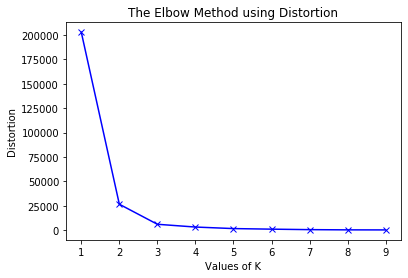

In [1689]:

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

    
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 
    

### Looking at the K value graph,the K value started to flatten at 3. So 3 is the optimal number of clusters for this data. 

In [1676]:
kclusters = 3
# run k-means clustering with  algorithm="elkan" to use triangle inequality .
kmeans = KMeans(n_clusters=kclusters, random_state=0,init='k-means++', n_init=20,
                 max_iter=300, algorithm="elkan").fit(wake_cluster)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [1679]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', pd.Series(kmeans.labels_))


Create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [1680]:
wake_merged = neighborhoods_venues_sorted
wake_merged=pd.merge(wake_merged,school_Total_Count, 
         how='left',left_on=wake_merged['Postcode'].astype(str), right_on=school_Total_Count['ZIPCODE'].astype(str))[['Cluster Labels', 'Postcode', '1st Most Common Venue',       '2nd Most Common Venue', '3rd Most Common Venue',       '4th Most Common Venue', '5th Most Common Venue',       '6th Most Common Venue', '7th Most Common Venue',       '8th Most Common Venue', '9th Most Common Venue',       '10th Most Common Venue','CITY_x' ,'Latitude' ,'Longitude','geo']]

In [1681]:
wake_merged.head()

,Cluster Labels,Postcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,CITY_x,Latitude,Longitude,geo
0,0,27502,Elementary Schools,Middle School,High School,Construction & Landscaping,Pool,Future Sites,Baseball Field,Australian Restaurant,Playground,NaN,Apex,35.728903,-78.893192,"(35.7289032, -78.89319159574836)"
1,2,27511,Elementary Schools,Salon / Barbershop,Pizza Place,American Restaurant,Grocery Store,Chinese Restaurant,Spa,Salad Place,Restaurant,Candy Store,Cary,35.756440,-78.781422,"(35.7564404, -78.781422)"
2,2,27513,Elementary Schools,Pub,Middle School,Magnet Middle School,Basketball Court,Magnet Elementary School,Bakery,NaN,NaN,NaN,Cary,35.812964,-78.807428,"(35.812963749999994, -78.80742802541542)"
3,2,27518,Administration,Pool,Elementary Schools,Park,Magnet High School,Special / Optional Schools,Locksmith,Rental Car Location,Food Stand,Trail,Cary,35.754712,-78.755326,"(35.75471245, -78.75532640688729)"
4,2,27519,Elementary Schools,Middle School,High School,Park,Karaoke Bar,NaN,NaN,NaN,NaN,NaN,Cary,35.797509,-78.881219,"(35.797509370161215, -78.88121876337784)"


In [1682]:
wake_merged=pd.merge(wake_merged,Raleigh_neighborhoods[['ZIPCODE','location']],how='left',left_on='Postcode',right_on='ZIPCODE')
#Raleigh_neighborhoods[['ZIPCODE','location']]

In [1683]:
wake_merged.columns

Index(['Cluster Labels', 'Postcode', '1st Most Common Venue',
       '2nd Most Common Venue', '3rd Most Common Venue',
       '4th Most Common Venue', '5th Most Common Venue',
       '6th Most Common Venue', '7th Most Common Venue',
       '8th Most Common Venue', '9th Most Common Venue',
       '10th Most Common Venue', 'CITY_x', 'Latitude', 'Longitude', 'geo',
       'ZIPCODE', 'location'],
      dtype='object')

# Visualize clusters using Folium

In [1505]:
#Gather the geo info as lists for markers
address = 'Wake County'
geolocator = Nominatim(user_agent="NC")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude


In [1506]:
location

Location(Wake County, North Carolina, United States of America, (35.7979355, -78.6118311, 0.0))

In [1684]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(wake_merged['Latitude'],wake_merged['Longitude'], wake_merged['location'], wake_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters
#### Lets try to visualize the distinguishing features of each neighborhood.

In [1528]:
#Function to join all the "N" common venues
def total_venue_categories(df):
    df_all_venues = df['1st Most Common Venue']
    df_all_venues = df_all_venues.append(df['2nd Most Common Venue'])
    df_all_venues = df_all_venues.append(df['3rd Most Common Venue'])
    df_all_venues = df_all_venues.append(df['4th Most Common Venue'])
    df_all_venues = df_all_venues.append(df['5th Most Common Venue'])
    df_all_venues = df_all_venues.append(df['6th Most Common Venue'])
    df_all_venues = df_all_venues.append(df['7th Most Common Venue'])
    df_all_venues = df_all_venues.append(df['8th Most Common Venue'])
    df_all_venues = df_all_venues.append(df['9th Most Common Venue'])
    df_all_venues = df_all_venues.append(df['10th Most Common Venue'])
    df_cnt = df_all_venues.value_counts().to_frame().reset_index()
    df_cnt.columns = ['Venue Category', 'Venue Count']
    df_cnt.sort_values(by = 'Venue Count', ascending = False)
#return the top 10 venue categories
    return df_cnt.head(10)

### <i><font color=red>Cluster 0:  Suburban life. Great for families with kids of any age and low budget.


In [1564]:
wake0 = wake_merged.loc[wake_merged['Cluster Labels'] == 0, wake_merged.columns[[1] + list(range(2, wake_merged.shape[1]))]]
wake0.head()

,Postcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,CITY_x,Latitude,Longitude,geo,ZIPCODE,location
10,27545,Elementary Schools,Construction & Landscaping,Airport,Convenience Store,High School,Magnet Elementary School,NaN,NaN,NaN,NaN,Knightdale,35.804179,-78.442018,"(35.8041788, -78.4420184)",27545,"(Eagle Rock, Raleigh, Wake County, North Carol..."
12,27571,Elementary Schools,Construction & Landscaping,Gym Pool,Furniture / Home Store,Future Sites,Fast Food Restaurant,Middle School,Playground,High School,Hot Dog Joint,Rolesville,35.923239,-78.459019,"(35.923239204387066, -78.45901911646567)",27571,"(Wake County, North Carolina, 27571, United St..."
14,27591,Elementary Schools,Middle School,Future Sites,High School,Trail,Magnet Elementary School,Park,NaN,NaN,NaN,Wendell,35.781994,-78.383973,"(35.781993674735425, -78.3839731595471)",27591,"(Wendell, Wake County, North Carolina, 27591, ..."
15,27592,Garden Center,Elementary Schools,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Willow Springs,35.575451,-78.656199,"(35.5754512, -78.65619922038601)",27592,"(Mount Pleasant, Raleigh, Wake County, North C..."
16,27597,Construction & Landscaping,Magnet Middle School,Elementary Schools,Magnet Elementary School,NaN,NaN,NaN,NaN,NaN,NaN,Zebulon,35.847976,-78.305703,"(35.84797614760106, -78.30570328963266)",27597,"(Wake County, North Carolina, 27597, United St..."


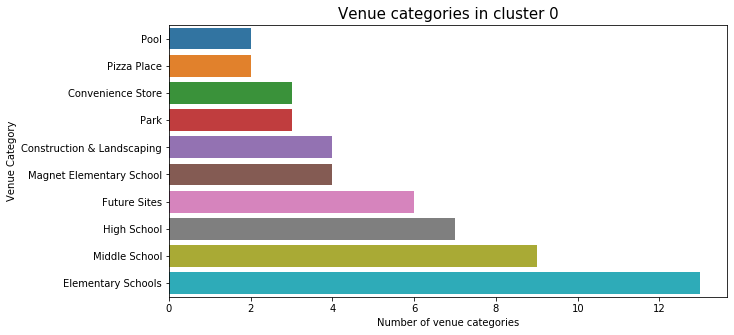

In [1685]:
import seaborn as sns

c0 = total_venue_categories(wake_merged[wake_merged['Cluster Labels'] == 0])
c0.sort_values(by=['Venue Count'],inplace=True,ascending=True)

fig = plt.figure(figsize=(10,5))
s=sns.barplot( x='Venue Count',y="Venue Category", data=c0)
#s.set_xticklabels(s.get_xticklabels(), rotation=0)
plt.title('Venue categories in cluster 0', fontsize=15)
plt.ylabel("Venue Category", fontsize=10)
plt.xlabel ('Number of venue categories', fontsize=10)
plt.savefig("Cluster0.png", dpi=300)
plt.show(s)

### CLUSTER 0 Red color

Observing the venues in the above chart, 
There are good number of schools in this area.
There aren't many restaurants in this area.
There are Future sites,zoned for future use by the county. This tells that these areas are yet to reach their full potential.

My analysis is that, these zipcodes are located away from busy areas like downtown, and the real estate price is typically at or below average when compared to the county average.

<b>Schools Availability:</b> High <br>
<b>Real Estate Price  range Estimate:</b> Low. This cluster is not crowded and is spread out away from the center.<br>
<b>Food and Entertainment index:</b> Medium. Not many restaurants.<br>
<b>Investment Return potential:</b> High

#### <i><font color=darkViolet> Cluster 1: Great for out going families , high achieving children and families with children who have special needs<i>

In [ ]:
cluster1 = wake_merged.loc[wake_merged['Cluster Labels'] == 1, wake_merged.columns[[1] + list(range(2, wake_merged.shape[1]))]]
cluster1.head()

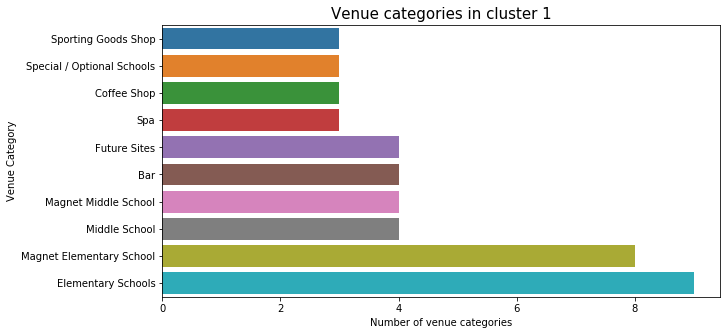

In [1686]:
import seaborn as sns

c1 = total_venue_categories(wake_merged[wake_merged['Cluster Labels'] == 1])
c1.sort_values(by=['Venue Count'],inplace=True,ascending=True)

fig = plt.figure(figsize=(10,5))
s=sns.barplot( x='Venue Count',y="Venue Category", data=c1)
#s.set_xticklabels(s.get_xticklabels(), rotation=0)
plt.title('Venue categories in cluster 1', fontsize=15)
plt.ylabel("Venue Category", fontsize=10)
plt.xlabel ('Number of venue categories', fontsize=10)
plt.savefig("Cluster 1.png", dpi=300)
plt.show(s)

In [1567]:
c1 = total_venue_categories(wake_merged[wake_merged['Cluster Labels'] == 1])

In [1612]:
#c1_order
c1.sort_values(by=['Venue Count'],inplace=True,ascending=True)

### CLUSTER 1 Violet color

Observing the venues in the above chart, 
There are very high number of schools in this area.
There are good number of restaurants and entertainment places in this area.
There are Future sites,zoned for future use by the county. This tells that the area is still yet to reach it's full potential, but is growing fast.

My analysis is that, these zipcodes are closer to busy areas like downtown, and the real estate price expected to be above average when compared to the county average.

<b>Schools Availability:</b> High <br>
<b>Real Estate Price  range Estimate:</b> High. This cluster is crowded and is closer to the center. The number of schools indicate a high population density in that area. But there are good number of future sites which indicates there is still some scope for development.<br>
<b>Food and Entertainment index:</b> Medium. <br>
<b>Investment Return potential:</b> High

#### <i><font color=green> Cluster 2: Downtown area. For fun loving parents, for whom real estate cost is not a barrier.<i>

In [ ]:
cluster2 = wake_merged.loc[wake_merged['Cluster Labels'] == 2, wake_merged.columns[[1] + list(range(2, wake_merged.shape[1]))]]
cluster2

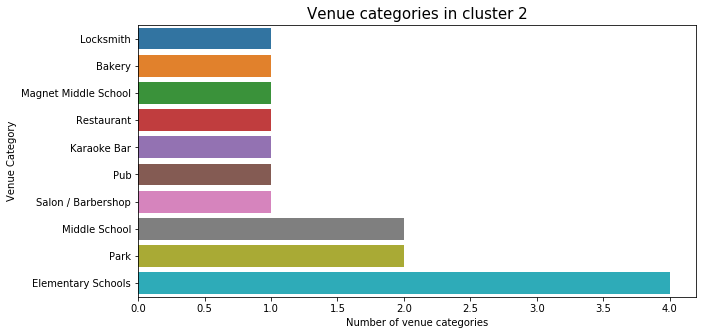

In [1687]:
import seaborn as sns

c2 = total_venue_categories(wake_merged[wake_merged['Cluster Labels'] == 2])
c2.sort_values(by=['Venue Count'],inplace=True,ascending=True)

fig = plt.figure(figsize=(10,5))
s=sns.barplot( x='Venue Count',y="Venue Category", data=c2)
#s.set_xticklabels(s.get_xticklabels(), rotation=0)
plt.title('Venue categories in cluster 2', fontsize=15)
plt.ylabel("Venue Category", fontsize=10)
plt.xlabel ('Number of venue categories', fontsize=10)
plt.savefig("Cluster2.png", dpi=300)
plt.show(s)

### CLUSTER 2 Green color

Observing the venues in the above chart, 
There are not many schools in this arcluster compared to others.
The number of restaurants and entertainment places in this area are high compared to others.
There are no Future sites,zoned for future use by the county. This tells that the area is most likely well established and there is very little space for future development.

My analysis is that, these zipcodes are in the downtown ares, and the real estate price expected to be high when compared to the county average.

<b>Schools Availability:</b> Medium (Not many Schools)<br>
<b>Real Estate Price range Estimate:</b> High. This cluster is crowded and is closer to the center. No future sites which indicates the area is well established.<br>
<b>Food and Entertainment index:</b> High. <br>
<b>Investment Return potential:</b> High. Since the areas are well established the real estate is like expensive. But,the return of investment can go higher with the population increase.